<a href="https://colab.research.google.com/github/favourphilic/Python-Project/blob/main/Cryptocurrency_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/MyFolder/DataSet/coingeko.csv')
#df.head()


In [ ]:
profile = ProfileReport(df, title="Pandas Profilling Report")

TypeError: ignored

In [ ]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'coins', 'coins-href',
       'name', 'currPrice', 'makcap', '24hrsVol', 'ATH', 'ATL', 'TotalSupply',
       'CircuSupply', 'maxSupply', '24hrs', '7days', '30days'],
      dtype='object')

In [ ]:
df.shape

(100, 16)

In [ ]:
df.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
coins                      0
coins-href                 0
name                       0
currPrice                  0
makcap                     0
24hrsVol                 100
ATH                        0
ATL                        0
TotalSupply                0
CircuSupply                0
maxSupply                 33
24hrs                      0
7days                      0
30days                    42
dtype: int64

As we can see, I will be deleting some of the columns that will not contribute to the analysis.


1.   I will remove the web-scraper-order,web-scraper-order-url, coins and coins-href columns.
2.   Also, I will remove the 24hrs volume columns, as it cointains only null values.
3. 30days changes isn't complete, it has 42 nulls, that columns will be removed too.
4. Although, the MaxSupply column is not complete.Therefore, it will deleted because it is not needed for this analysis.



In [ ]:
df.drop(['web-scraper-order','web-scraper-start-url','coins','coins-href','24hrsVol','30days', 'maxSupply'], axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,name,currPrice,makcap,ATH,ATL,TotalSupply,CircuSupply,24hrs,7days
0,FTX Token (FTT),$46.39,"$6,392,788,401",$84.18,$1.15,"333,688,070","137,818,734",11.3%,16.2%
1,cETH (CETH),$58.64,"$3,402,465,396",$97.75,$1.89,"58,025,506","58,025,506",11.8%,13.7%
2,Internet Computer (ICP),$19.98,"$4,146,340,107",$700.65,$14.88,"469,213,710","207,645,595",12.6%,12.5%
3,Uniswap (UNI),$10.37,"$4,735,409,685",$44.92,$1.03,"1,000,000,000","456,489,583",8.2%,20.9%
4,Cronos (CRO),$0.441677,"$11,163,055,867",$0.965407,$0.01211960,"30,263,013,692","25,263,013,692",11.3%,14.3%


In [ ]:
df.dtypes

name           object
currPrice      object
makcap         object
ATH            object
ATL            object
TotalSupply    object
CircuSupply    object
24hrs          object
7days          object
dtype: object

In [ ]:
# split column and add new columns to df
df[['name', 'symbol']] = df['name'].str.split('(', expand=True)
# display the dataframe

In [ ]:
#Here, I will be adding additional columns, which will be in the float data type as opppose to object data type, also remooving all the signs($,%,and ,)
df['MarketCapt']= df['makcap'].replace('[^\d.]','',regex=True).astype(float)
df['CurrentPrice']= df['currPrice'].replace('[^\d.]','',regex=True).astype(float)
df['all_timeHigh']= df['ATH'].replace('[^\d.]','',regex=True).astype(float)
df['all_timeLow']= df['ATL'].replace('[^\d.]','',regex=True).astype(float)
df['24hrsPercentChange']= df['24hrs'].replace('[^\d.]','',regex=True).astype(float)
df['7daysPercentChange']= df['7days'].replace('[^\d.]','',regex=True).astype(float)
df.head()


,name,currPrice,makcap,ATH,ATL,TotalSupply,CircuSupply,24hrs,7days,symbol,MarketCapt,CurrentPrice,all_timeHigh,all_timeLow,24hrsPercentChange,7daysPercentChange
0,FTX Token,$46.39,"$6,392,788,401",$84.18,$1.15,"333,688,070","137,818,734",11.3%,16.2%,FTT),6.392788e+09,46.390000,84.180000,1.15000,11.3,16.2
1,cETH,$58.64,"$3,402,465,396",$97.75,$1.89,"58,025,506","58,025,506",11.8%,13.7%,CETH),3.402465e+09,58.640000,97.750000,1.89000,11.8,13.7
2,Internet Computer,$19.98,"$4,146,340,107",$700.65,$14.88,"469,213,710","207,645,595",12.6%,12.5%,ICP),4.146340e+09,19.980000,700.650000,14.88000,12.6,12.5
3,Uniswap,$10.37,"$4,735,409,685",$44.92,$1.03,"1,000,000,000","456,489,583",8.2%,20.9%,UNI),4.735410e+09,10.370000,44.920000,1.03000,8.2,20.9
4,Cronos,$0.441677,"$11,163,055,867",$0.965407,$0.01211960,"30,263,013,692","25,263,013,692",11.3%,14.3%,CRO),1.116306e+10,0.441677,0.965407,0.01212,11.3,14.3


In [ ]:
cols= ['currPrice','makcap','ATH','ATL','TotalSupply','CircuSupply','24hrs','7days']
df = df.drop(cols, axis=1)
df.head()

,name,symbol,MarketCapt,CurrentPrice,all_timeHigh,all_timeLow,24hrsPercentChange,7daysPercentChange
0,FTX Token,FTT),6.392788e+09,46.390000,84.180000,1.15000,11.3,16.2
1,cETH,CETH),3.402465e+09,58.640000,97.750000,1.89000,11.8,13.7
2,Internet Computer,ICP),4.146340e+09,19.980000,700.650000,14.88000,12.6,12.5
3,Uniswap,UNI),4.735410e+09,10.370000,44.920000,1.03000,8.2,20.9
4,Cronos,CRO),1.116306e+10,0.441677,0.965407,0.01212,11.3,14.3


In [ ]:
#Rechecking the df data type, all the numerical columns are now in float, and ready for arithmetic operations.
df.dtypes

name                   object
symbol                 object
MarketCapt            float64
CurrentPrice          float64
all_timeHigh          float64
all_timeLow           float64
24hrsPercentChange    float64
7daysPercentChange    float64
dtype: object

In [ ]:
marketCap = df[['name','MarketCapt']]
Cap = marketCap.sort_values(by='MarketCapt',ascending=False)
Cap10 = Cap[:10].set_index('name')
Cap10

,MarketCapt
name,
Bitcoin,8.259074e+11
Ethereum,3.502374e+11
Tether,7.973741e+10
BNB,6.862430e+10
USD Coin,5.357091e+10
XRP,3.717316e+10
Terra,3.330008e+10
Cardano,3.111075e+10
Solana,3.100828e+10


In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

In [ ]:
colors=['green', 'blue', 'purple', 'magenta', 'cyan', 'green','yellow','lightblue', 'red','black']

In [ ]:
Cap10= Cap10.assign(market_cap_perc = lambda x: ( x.MarketCapt
                               / x.MarketCapt.sum())*100)

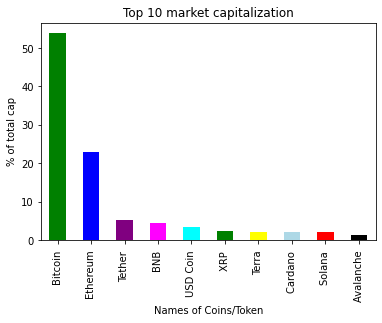

In [ ]:
import seaborn as sns
ax = Cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE, color=colors)
ax.set_xlabel('Names of Coins/Token')
ax.set_ylabel(TOP_CAP_YLABEL)
plt.show()

In [ ]:
# Selecting everything bigger than 30 billion 
LargeCaps = df.query('MarketCapt > 3E+10')
# Selecting coins with market capital between 2 billion and less than 30 billion 
MediumCaps = df.query('MarketCapt >= 2E+9 & MarketCapt < 3E+10')
# Selecting coins with market capital less than 2billion 
LowCaps = df.query('MarketCapt < 2E+9')



In [ ]:
label = ['largeCaps','mediumCaps','lowCaps']
values = [len(LargeCaps),len(MediumCaps),len(LowCaps)]


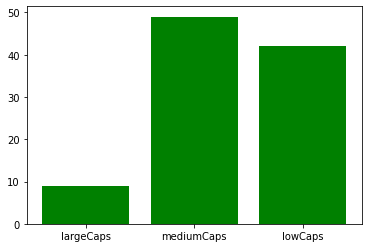

In [ ]:
plt.bar(label,values,color='g')
plt.show()

In [ ]:
newdf = df.query('MarketCapt > 2.14E+10')
newdf

,name,symbol,MarketCapt,CurrentPrice,all_timeHigh,all_timeLow,24hrsPercentChange,7daysPercentChange
8,USD Coin,USDC),5.357091e+10,1.000000,1.17,0.891848,0.1,0.1
39,XRP,XRP),3.717316e+10,0.775432,3.40,0.002686,7.2,9.9
40,Avalanche,AVAX),2.140029e+10,86.940000,144.96,2.800000,17.5,24.2
44,Cardano,ADA),3.111075e+10,0.970074,3.09,0.019253,11.1,12.8
59,BNB,BNB),6.862430e+10,408.350000,686.31,0.039818,12.4,14.4
60,Ethereum,ETH),3.502374e+11,2926.430000,4878.26,0.432979,12.0,13.7
70,Terra,LUNA),3.330008e+10,88.740000,103.34,0.121798,22.4,76.6
88,Solana,SOL),3.100828e+10,96.730000,259.96,0.500801,11.3,16.3
98,Tether,USDT),7.973741e+10,1.000000,1.32,0.572521,0.0,0.1
99,Bitcoin,BTC),8.259074e+11,43534.700000,69044.77,67.810000,14.5,17.5


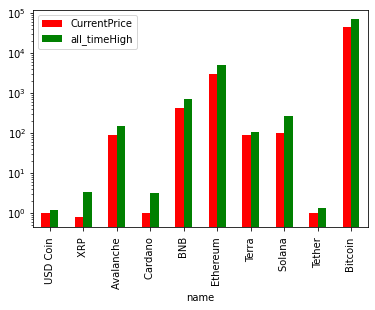

In [ ]:
fig, ax = plt.subplots()
newdf.plot.bar(x = 'name', y = ['CurrentPrice', 'all_timeHigh'], rot = 90, ax = ax, color=['red','green'])
ax.set_yscale('log')
plt.show()



*   The above plot show a group bar chart, comparing the current price as at the day the data was scraped and the all-time-high price of the top coins.

*   The Log scale was used due to inbalance in the scale of the different coins

*   Coins like XRP(Ripple), ADA(Cardano), and SOL(Solana) are still yet to recovered from the dip in the market, this can be seen by the wide difference between the all-time-high and the current price.

*   Coins like BTC(Bitcoin), ETH(Ethereum), Avalanche, and Terra are trading close to their all-time-high.

*   While their is no significant difference between the current Values and AllTimeHigh price of USD coin and USDT(Tether) because they are stable coins.








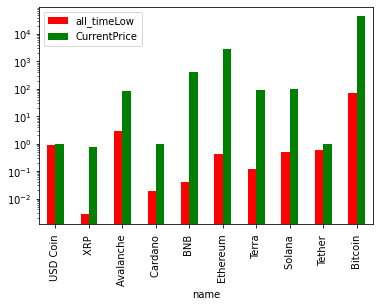

In [ ]:
fig, ax = plt.subplots()
newdf.plot.bar(x = 'name', y = ['all_timeLow','CurrentPrice'], rot = 90, ax = ax, color=['red','green'])
ax.set_yscale('log')
plt.show()



*   All the coins show a major upward movements  from their all-time-low compared to the current prices except USD Coin and Tether (USDT). For example, XRP had an all-time low of 0.002686 and a current price of 3.4, which implies a 1265% increase. This means that a user who invested just 100  dollar when it was at its all-time low will now have the investment increased to $126500– let's remember that the coin is still far below its all-time high, hmmm🤔.
*   Nill or non-significant movement in USD Coin and Tether also further confirms that both are examples of stable coins.



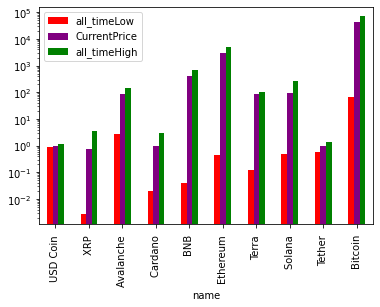

In [ ]:
fig, ax = plt.subplots()
newdf.plot.bar(x = 'name', y = ['all_timeLow','CurrentPrice','all_timeHigh'], rot = 90, ax = ax, color=['red','purple','green'])
ax.set_yscale('log')
plt.show()

## Conclusion



*   USD Coin and Tether (USDT) are examples of stable coins whose values are not significantly affected by changes in the market. Therefore, citizens of countries whose currency always face devaluations can consider saving their funds in this type of currency. (NB: NFA)
*   Movement of coins/tokens cannot be adequately predicted– an investor can gain 100% today and lose 5000% tomorrow.

*   The greatest rule in this asset class is to BUY low and SELL high, not the other way around.
*   Investors should always perceive this asset class as a long-term investment and not view it as a get-rich-quick scheme.







# Thank You!